# **PINN Project: Phase 1**

* **Reza Barzegar**
* **Contacting Me**:
  * Telegram ID: [@Lincraf_t](https://t.me/@Lincraf_t)

## Part 2: Introduction to Machine Learning, Neural Networks and Physics-Informed Neural Networks (PINN)

#### 2.1. What is Machine Learning (ML)?

Machine Learning (ML) is a subset of artificial intelligence (AI) that enables computers to learn from data without being explicitly programmed. It is fundamentally based on finding patterns in data and making predictions or decisions.

Mathematically, ML can be defined as the optimization of a function $f(x; \theta)$ that maps input data $x$ to an output $y$ using parameters $\theta$:

$$y=f(x; θ)$$

where:

*   $x$ represents the input data (features).
*   $\theta$ represents the model parameters that the algorithm learns.
*   $y$ is the predicted output.


**Types of ML**

1.  **Supervised Learning**: The algorithm learns from labeled data $(x_i, y_i)$ by minimizing an error function.
2.  **Unsupervised Learning**: The algorithm learns patterns from unlabeled data $x_i$.
3.  **Reinforcement Learning**:  The algorithm learns optimal actions by interacting with an environment.

---

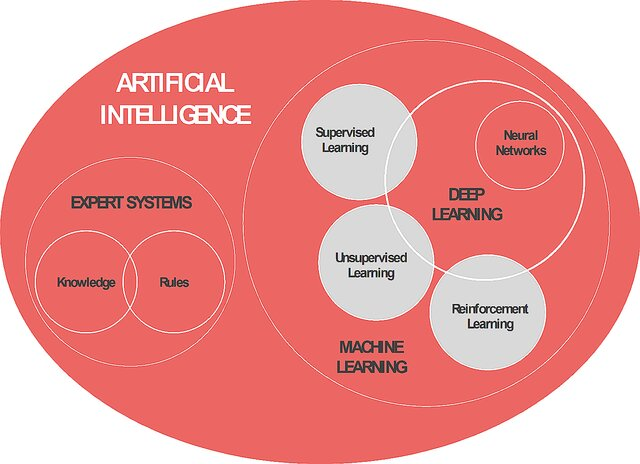



#### 2.2. Linear Regression

**What is Linear Regression?**

Linear regression is a classic method in supervised machine learning.

**Linear Regression** is a method to model the relationship between:
- an **input** \(x\) (also called the *feature* or *independent variable*),

- an **output** \(y\) (also called the *target*, *label*, or *dependent variable*).

The simplest form assumes this relationship is a straight line:

$$
y = w\,x + b,
$$

where:
- $w$ is often called the **weight** or **slope**,
- $b$ is the **bias** or **intercept**.




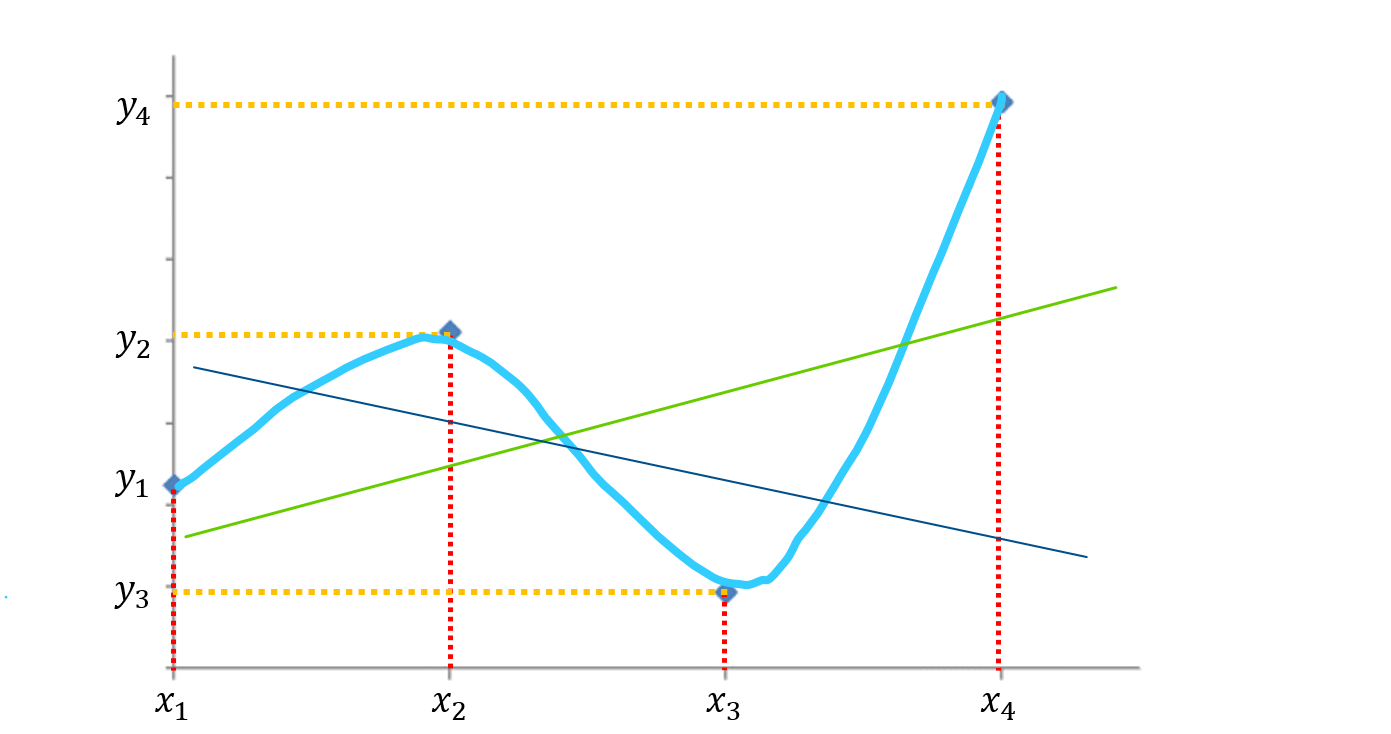



Given a **dataset** of $N$ points ${(x_i, y_i)}$ $i=1, 2, ..., N$), where each $x_i$ is an input and $y_i$ is the observed output, the linear regression model predicts:

$$
\hat{y}_i = w\,x_i + b.
$$

We want $w$ and $b$ to make $\hat{y}_i$ as close as possible to the **true** $y_i$. To measure this closeness, we define a **Mean Squared Error (MSE)** loss function:

$$
L(w,b) = \frac{1}{N} \sum_{i=1}^{N} \bigl[y_i - \hat{y}_i\bigr]^2
$$
$$
= \frac{1}{N} \sum_{i=1}^N \bigl[y_i - (w\,x_i + b)\bigr]^2.
$$

Our goal is to **find** the values of $w$ and $b$ that minimize $L$.



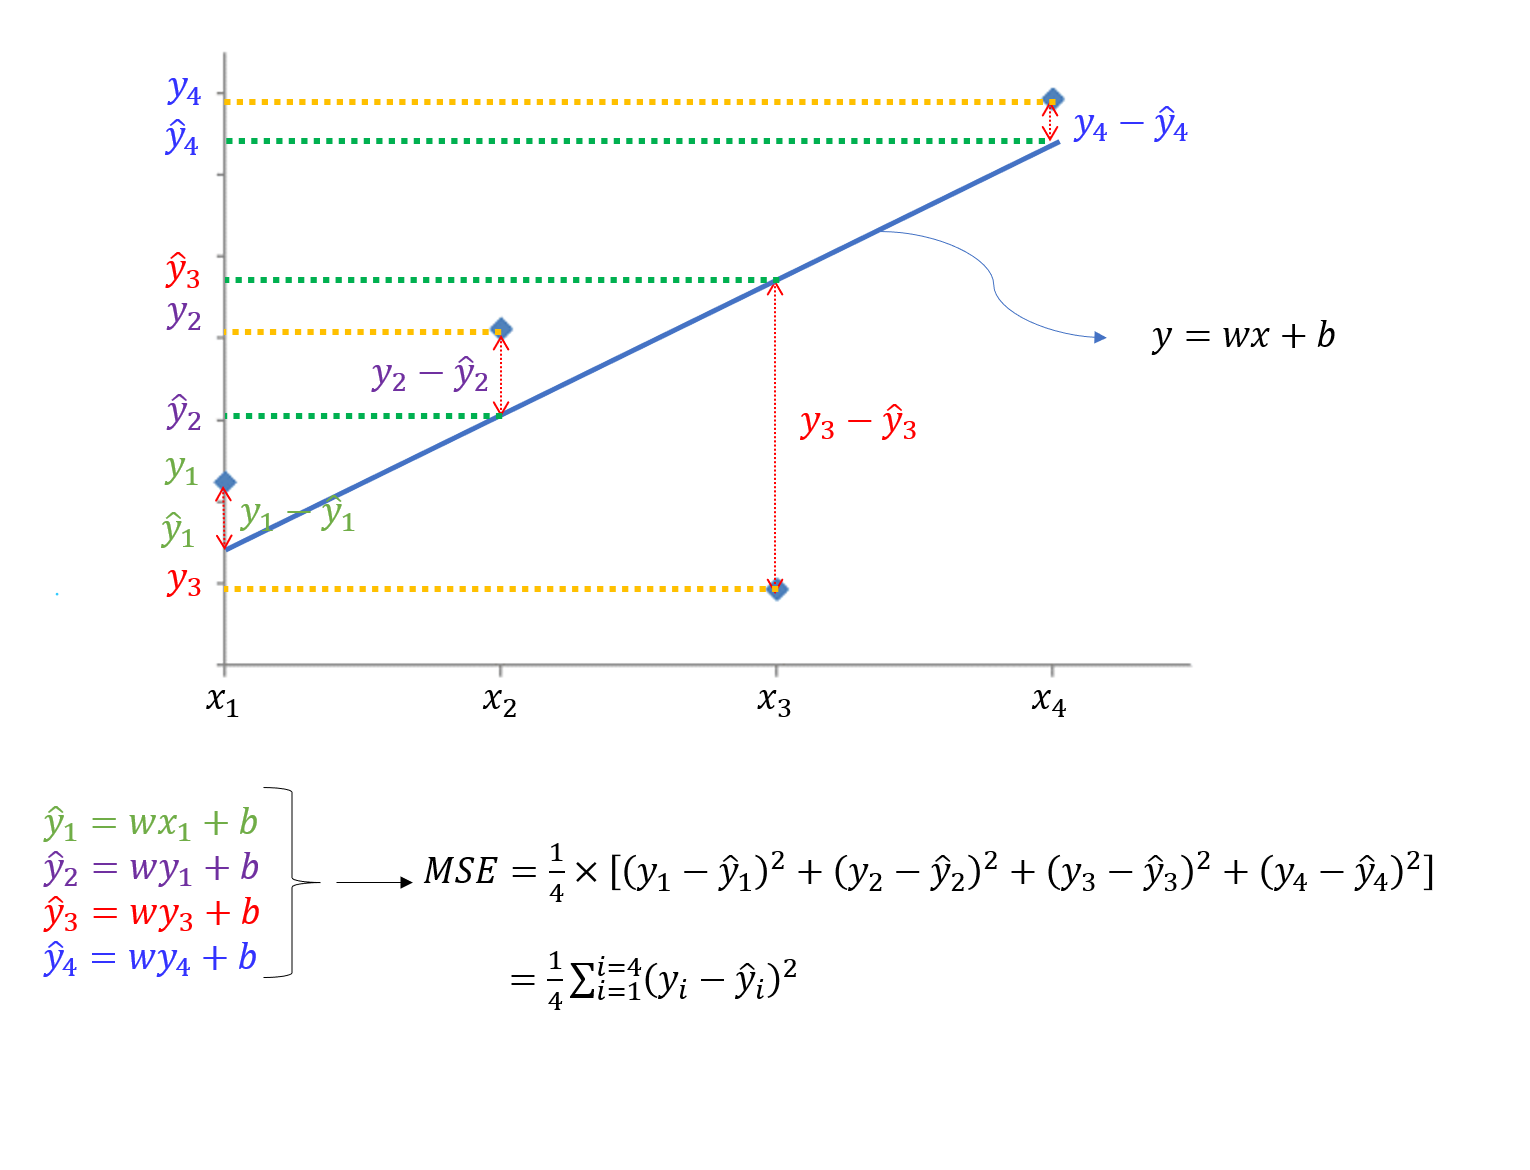


**Why is it Called "Supervised Learning"**

- We call it “Supervised” because we have **labeled** data $(x_i, y_i)$.
- The model learns a function $f(x)$ (which in this case is $w\,x + b$) that maps input $x$ to output $y$ using these labels.

**Example Contexts:**

- **Predicting House Prices**: $x$ might be the size of the house ($m^2$), and $y$ the price of the house.
- **Predicting Temperature over Time**: $x$ might be time (hours), and $y$ the temperature at that time.
---


#### 2.3. Neural Networks and PINN Approach

In this section, we go beyond linear regression and introduce the core concepts of **Neural Networks (NN)**. We will then extend these ideas to a **Physics-Informed Neural Network (PINN)** to solve a simple ODE.



##### 2.3.1. Neural Networks

A **Neural Network** (NN) is a computational model inspired by the biological neurons in human brains. It is composed of **layers** of interconnected "neurons." Each neuron is essentially a mathematical function that takes an input, multiplies it by a weight, adds a bias, applies an activation function, and sends the output to the next layer.

**Basic Architecture**

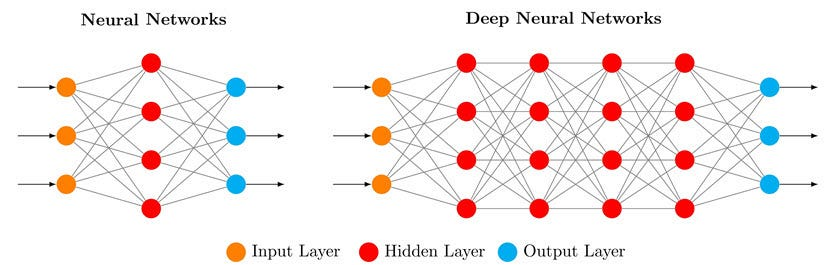

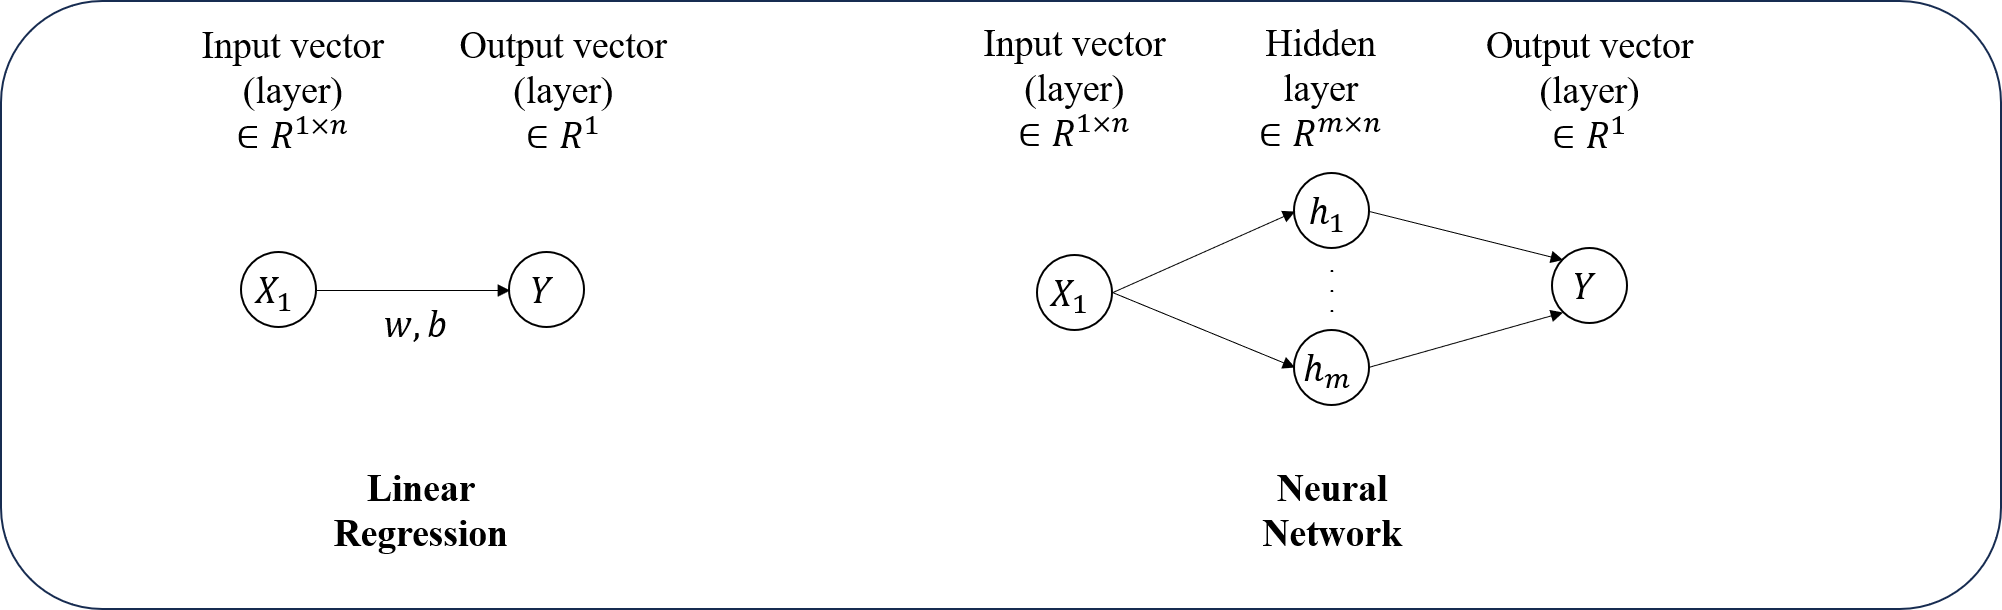

**Structure of a Neural Network**

A **Neural Network (NN)** is a computational model inspired by biological neurons. It consists of **layers** of interconnected neurons, each applying transformations to the input data.

 **Main Components**

1. **Input Layer**: Receives the raw data.  

   
2. **Hidden Layers**:  
   - Perform transformations using **weighted connections**, **biases**, and **non-linear activation functions** (e.g., **Tanh**, ReLU, Sigmoid).
   - Allow the network to learn complex patterns.

3. **Output Layer**:  
   - Produces the final prediction, such as $u(t)$.

---

**Mathematical Representation**
Each neuron in a neural network performs a **weighted sum** of its inputs, adds a bias term, and then applies an **activation function**:

$$
y = \sigma(Wx + b)
$$

where:
- $x$ is the **input vector**,
- $W$ is the **weight matrix**,
- $b$ is the **bias vector**,
- $\sigma(\cdot)$ is the **activation function**.

The activation function introduces **non-linearity**, allowing the neural network to model complex relationships.

---
**Loss Function (MSE)**

Although Neural Networks can use many types of loss functions, we focus on **Mean Squared Error (MSE)**, defined as
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N \bigl( y_i - \hat{y}_i \bigr)^2,
$$
where:
- $y_i$ is the true value (from data or from a target we want to match),
- $\hat{y}_i$ is the model's prediction,
- $N$ is the number of data points.



The goal of NN training is to find optimal $W$ and $b$ that minimize a loss function $L(y, \hat{y})$, where $\hat{y}$ is the true label.

---


**Activation Functions**

**Why do we need activation functions?**
- If we **don’t** use activation functions, the entire neural network collapses into a **linear model**, making it ineffective for solving complex problems.
- Activation functions allow the network to capture **non-linear** relationships, which are crucial for solving differential equations.

There are multiple types of activation functions. The three most common ones are:

1. **Sigmoid Function**:  
   $$
   \sigma(x) = \frac{1}{1 + e^{-x}}
   $$
   - **Output Range**: (0,1)
   - **Used for**: Binary classification, probability-based outputs.
   - **Issue**: Can cause **vanishing gradients** for large or small values of \( x \).

2. **ReLU (Rectified Linear Unit)**:  
   $$
   f(x) = \max(0, x)
   $$
   - **Output Range**: $[0, \infty)$
   - **Used for**: Deep networks, general learning tasks.
   - **Issue**: Neurons can become "dead" (always output 0 for negative inputs).

3. **Tanh (Hyperbolic Tangent) Function**:
   $$
   f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
   $$
   - **Output Range**: (-1,1)
   - **Used for**: Solving differential equations (ODEs/PDEs), balanced outputs around 0.
   - **Key Benefit**:  
     - Unlike **Sigmoid**, it has an **output centered around 0**, making optimization smoother.
     - Works well in **physics-informed neural networks (PINNs)**.

---


In physics-related problems, the **Tanh function** is particularly useful because:
- Many physical phenomena are naturally **symmetric around zero**.
- It avoids shifting all outputs to be positive (like Sigmoid).
- It smoothly maps inputs from $ (-\infty, \infty)$ into  $(-1,1)$, which aligns well with many function solutions.

For our **PINN approach**, we will use `Tanh` activation because it helps approximate solutions to differential equations smoothly.


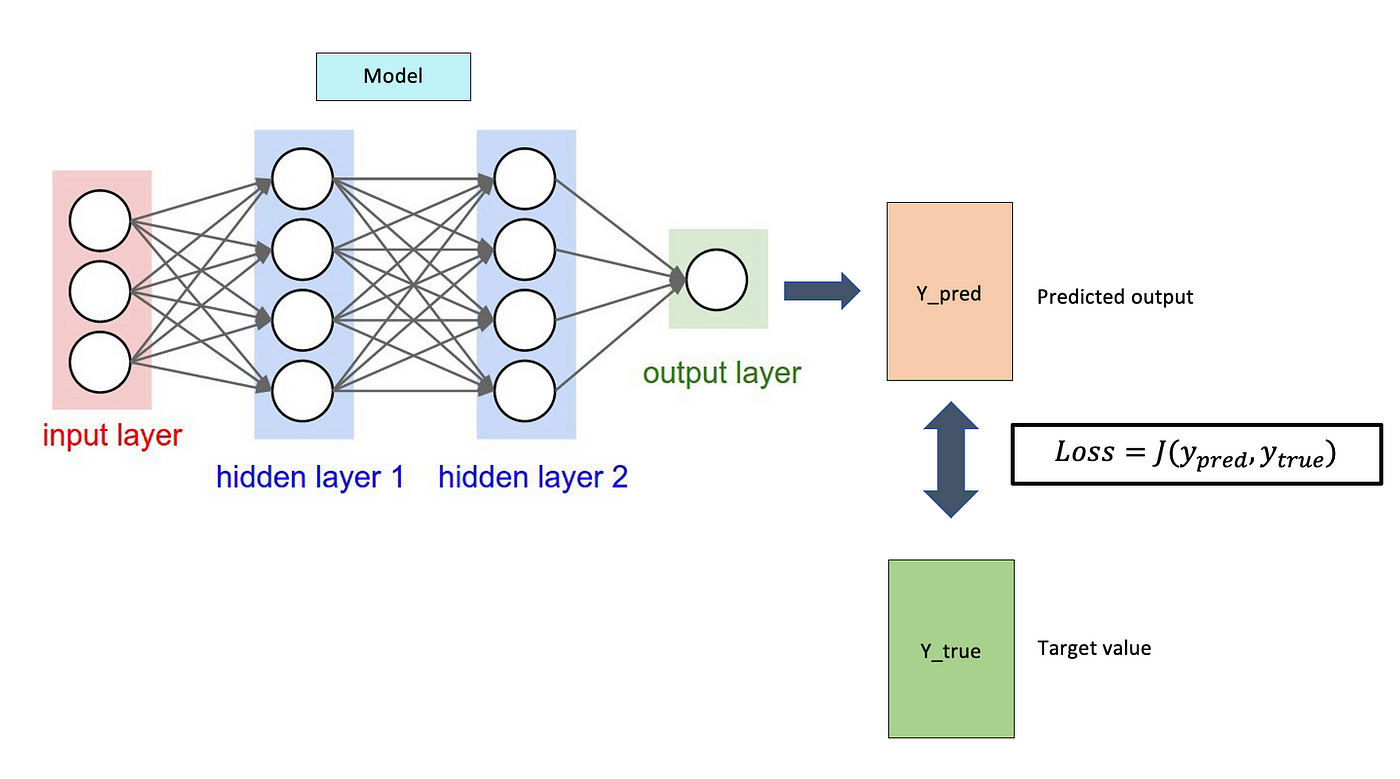

##### 2.3.2. Training a Neural Network

Once a **Neural Network (NN)** is defined, it must be trained to make accurate predictions. Training involves **iteratively updating the model's parameters (weights and biases)** so that the output **matches the desired values** as closely as possible.

A typical training process consists of four main steps:

---

 **Step 1: Forward Pass**
- The input **flows through the network**, layer by layer, until it reaches the output layer.
- Each layer applies a transformation using **weights, biases, and activation functions**.

Mathematically, for a **single layer**, this transformation is:
$$
z = W x + b
$$
$$
a = \sigma(z)
$$
where:
- $ x $ is the **input**
- $ W $ is the **weight matrix**,
- $ b $ is the **bias vector**,
- $ z $ is the **weighted sum** of inputs,
- $ \sigma(z) $ is the **activation function** (e.g., `Tanh`),
- $ a $ is the **output of the layer**.

For a **multi-layer network**, the output of one layer serves as the input for the next.

---

**Step 2: Loss Computation**
Once the NN produces an output, we compare it to the **true target value** using a **loss function**.


The **Mean Squared Error (MSE)** is a common loss function for regression tasks:
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} \bigl( y_i - \hat{y}_i \bigr)^2.
$$
where:
- $ y_i $ is the **true value** (ground truth),
- $ \hat{y}_i $ is the **predicted value** from the NN,
- $ N $ is the **number of training samples**.

The goal is to find weights $ W $ and biases $ b $ that **minimize this loss**.

---

**Step 3: Backpropagation (Gradient Computation)**
To update the NN’s parameters, we compute the **gradient (derivative) of the loss function** with respect to every trainable parameter. This is done using the **chain rule of differentiation**, also known as **backpropagation**.

**Gradient Computation**
Using the chain rule, the gradient of the loss $ L $ with respect to (w.r.t.) a **parameter**  $\theta$ (which could be $W$ or $b$) is:

$$
\frac{\partial L}{\partial \theta} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta}
$$

Since $\hat{y} = \sigma(W x + b) $, we expand:

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial \hat{y}} \cdot \sigma'(W x + b) \cdot x
$$

The computed gradients tell us how to **adjust** each parameter to decrease the loss.

---

**Step 4: Parameter Update (Gradient Descent)**
Once we have the **gradients** of the loss function w.r.t. each parameter, we update them using an optimization algorithm.



Gradient Descent (GD) is one of the simplest optimization algorithms. It updates the weights and biases **in the opposite direction** of the computed gradients to minimize the loss function.

**Gradient Descent Update Rule**

For each trainable parameter $\theta$, the update rule is:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \frac{\partial L}{\partial \theta}.
$$

where:
- $\theta^{(t)}$ is the parameter value at iteration $t$,
- $ \eta$ (eta) is the **learning rate**,
- $ \frac{\partial L}{\partial \theta}$ is the **gradient of the loss function** w.r.t. the parameter $ \theta$.

This process is repeated for multiple **epochs** (full passes over the dataset).



**What is the Learning Rate $(\eta)$?**

The **learning rate** $(\eta)$ is a hyperparameter that controls how much we adjust the model parameters during each update.

- **Small $\eta$**: Leads to slow training, but more stable.
- **Large $\eta$**: Can speed up training but may cause oscillations or even divergence.
- **Optimal $\eta$**: Found via experimentation (e.g., 0.01, 0.1).

#### **Effect of Learning Rate**
- If **$\eta$ is too small**, updates are tiny, and learning is **very slow**.
- If **$\eta$ is too large**, updates are too big, and the model may **fail to converge**.

---

### **Full Training Process**
At each training step (epoch):
1. **Forward Pass**: Compute the output $\hat{y}$.
2. **Loss Computation**: Evaluate how far $\hat{y}$ is from $y$.
3. **Backpropagation**: Compute gradients of  $L $ w.r.t. $(W, b)$.
4. **Gradient Descent Update**: Adjust $( W, b )$ using:

   $$
   W \leftarrow W - \eta \frac{\partial L}{\partial W}
   $$
   $$
   b \leftarrow b - \eta \frac{\partial L}{\partial b}
   $$

5. Repeat for multiple epochs.

This cycle allows the NN to learn an **optimal function** mapping inputs to outputs.

---




#### 2.4.  PINN Approach for solving an ODE


**ODE and Its Exact Solution**

We want to solve:
$$
\frac{du}{dt} = \cos(2\pi t), \quad u(0) = 1.
$$

The exact solution is obtained by integrating $cos(2\pi t)$:
$$
u(t) = \int_0^t \cos(2\pi \tau) \; d\tau + u(0).
$$
We know that:
$$
\int \cos(2\pi t) \; dt = \frac{1}{2\pi}\sin(2\pi t).
$$
Hence,
$$
u(t) = \frac{1}{2\pi}\sin(2\pi t) + 1.
$$


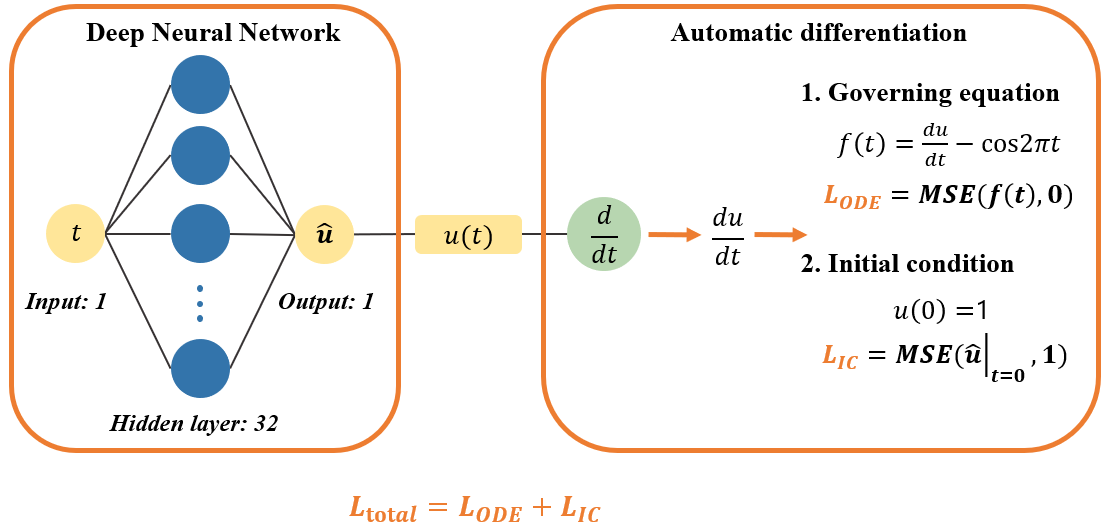


**How a PINN Solves This ODE**

A **Physics-Informed Neural Network (PINN)** uses the **differential equation** directly in its loss function. Here's the idea:

1. **Neural Network as $\hat{u}(t)$**:  
   We let a neural network approximate $u(t)$. The network has:
   - Input: $t$,
   - Output: $\hat{u}(t; \theta)$, where $\theta$ represents all the trainable parameters (weights, biases).

2. **Automatic Differentiation**:  
   We can use frameworks like PyTorch to compute $\frac{d\hat{u}}{dt}$ automatically via backpropagation.

3. **Loss Function**:  
   - **ODE Loss**: We want $\frac{d\hat{u}}{dt}$ to match $\cos(2\pi t)$. So we penalize the difference:
$$     
 \text{Loss}_{\text{ODE}} = \frac{1}{N}\sum_{i=1}^{N} \Bigl[\frac{d\hat{u}}{dt}\bigl(t_i\bigr) - \cos(2\pi t_i)\Bigr]^2.
$$
Here, $t_i$ that $i=1,...,N$ are "collocation" points in the domain (e.g., $t\in[0,1]$).
   
   - **Initial Condition (IC) Loss**: We want $\hat{u}(0) = 1$. So we add a penalty:
$$
     \text{Loss}_{\text{IC}} = \bigl[\hat{u}(0) - 1\bigr]^2.     
$$

4. **Total Loss**:
$$
   \text{Loss}_{\text{total}} = \text{Loss}_{\text{ODE}} + \text{Loss}_{\text{IC}}.
$$
  
   By minimizing $\text{Loss}_{\text{total}}$, the network learns a function $\hat{u}(t)$ that satisfies both the differential equation and initial condition.

5. **Training**:  
   - In each **epoch**, we:
     1. Compute $\hat{u}(t)$ for all $t_i$,
     2. Compute $\\frac{d\hat{u}}{dt}(t_i)$ via autograd,
     3. Evaluate losses.
     4. Backpropagate and update $\theta$.

Next Steps:

We'll now **implement** this PINN approach in PyTorch to solve for $u(t)$ in the domain $[0,1]$.


##### 2.4.1. Implementation in PyTorch

We will:

1. Import libraries and define a neural network architecture.
2. Generate "collocation points" in $[0,1]$ where we enforce the ODE.
3. Write a custom **loss function** that calculates both ODE and IC loss.
4. Train the network to find $\hat{u}(t)$.
5. Compare the PINN solution to the **exact** solution of $u(t) = \frac{1}{2\pi}\sin(2\pi t) + 1$.

We'll go step by step so you can see how each piece is built.


**Step 1: Define the Neural Network Model**

We'll build a small neural network class in PyTorch:

- **Input**: scalar $t$ (shape: (batch_size, 1)).
- **Hidden Layers**: Let's use 2 hidden layers, each with 20 neurons, and a $\tanh$ activation.
- **Output**: scalar $\hat{u}(t)$.



In [ ]:
# Code Cell 1: Imports

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# For reproducibility
torch.manual_seed(0)

print("Libraries imported: torch, nn, optim, matplotlib.")


Libraries imported: torch, nn, optim, matplotlib.


In [ ]:
# Code Cell 2: NN Model Definition

class PINN(nn.Module):
    def __init__(self, neurons=20):
        super(PINN, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(1, neurons),
            nn.Tanh(),
            nn.Linear(neurons, neurons),
            nn.Tanh(),
            nn.Linear(neurons, 1)
        )

    def forward(self, t):
        return self.net(t)

# Create an instance of the model
model = PINN(neurons=20)

print("PINN model created with 2 hidden layers, 20 neurons each.")


PINN model created with 2 hidden layers, 20 neurons each.


**Step 2: Generate Collocation Points**

We will choose $N$ points in $[0,1]$. We'll pass these $t$-values into our neural network and enforce the ODE and initial condition at these points.

Typical approach:
1. **Linspace** from 0 to 1 (e.g., 50 or 100 points).
2. These become our "training data" for the physics part.

We don't have direct "labels" for $u(t)$ at these points; instead, we impose the ODE.


In [ ]:
# Code Cell 3: Generate Collocation Points

N = 50
t_colloc = torch.linspace(0.0, 1.0, N).unsqueeze(1)  # shape: (N,1)
t_colloc.requires_grad = True  # We need gradients wrt t

print("Collocation points t_colloc:")
print(t_colloc[:5], "...")


Collocation points t_colloc:
tensor([[0.0000],
        [0.0204],
        [0.0408],
        [0.0612],
        [0.0816]], grad_fn=<SliceBackward0>) ...


**Step 3: Define the Loss Function (ODE + IC)**

1. **ODE Residual**:
   - We get $\hat{u}(t)$ from the network.
   - We compute $\frac{d\hat{u}}{dt}$ using PyTorch's `torch.autograd.grad`.
   - We compare it to $\cos(2\pi t)$ via an MSE.

2. **Initial Condition Residual**:
   - Evaluate $\hat{u}(0)$.
   - Compare it to the known $u(0)=1$.

3. **Total Loss**:
   $$
   \text{Total Loss} = \text{MSE} \Bigl( \frac{d\hat{u}}{dt}, \cos(2\pi t) \Bigr) \; + \; \bigl( \hat{u}(0) - 1 \bigr)^2.
   $$

We'll write a helper function `pinn_loss` that computes this total loss.


In [ ]:
# Code Cell 4: Defining the PINN Loss Function

def pinn_loss(model, t_vals):
    # Forward pass: get u(t)
    u_hat = model(t_vals)  # shape (N,1)

    # Compute du/dt via autograd
    # grad_outputs must have the same shape as u_hat
    dudt = torch.autograd.grad(
        u_hat, t_vals,
        grad_outputs=torch.ones_like(u_hat),
        create_graph=True
    )[0]

    # ODE residual: du/dt - cos(2 pi t)
    # We'll compute MSE of that residual
    ode_res = dudt - torch.cos(2.0 * torch.pi * t_vals)
    ode_loss = torch.mean(ode_res**2)

    # Initial condition: u(0) = 1
    # We can just evaluate model at t=0
    # Alternatively, we might gather the first collocation point if it's 0
    u0_hat = model(torch.tensor([[0.0]], requires_grad=True))
    bc_loss = (u0_hat - 1.0)**2  # scalar

    # Total loss
    return ode_loss + bc_loss


**Step 4: Set Up Optimizer and Train**

We'll use PyTorch's **Gradient Descnet (GD)** optimizer to minimize the PINN loss:

1. `optimizer.zero_grad()`: Zero out gradients from previous iteration.
2. `loss.backward()`: Compute gradients of the loss w.r.t. model parameters.
3. `optimizer.step()`: Update the parameters.

We'll train for a number of epochs (e.g., 3000). We'll track the loss over time to ensure it decreases.


In [ ]:
# Code Cell 5: Training the PINN using Gradient Descent (GD)

optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3000

for epoch in range(num_epochs):
    # Compute the total loss (ODE + IC)
    loss_value = pinn_loss(model, t_colloc)

    # Zero gradients, backprop, and step
    optimizer.zero_grad()  # Reset gradients
    loss_value.backward()  # Compute gradients (backpropagation)
    optimizer.step()  # Update parameters using gradient descent

    # Print progress every 500 epochs
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss = {loss_value.item():.6e}")


Epoch 500/3000, Loss = 4.991223e-01
Epoch 1000/3000, Loss = 4.817494e-01
Epoch 1500/3000, Loss = 3.453361e-01
Epoch 2000/3000, Loss = 5.285768e-03
Epoch 2500/3000, Loss = 1.743144e-03
Epoch 3000/3000, Loss = 1.460090e-03


**Step 5: Evaluate the PINN and Compare to Exact Solution**

We now:
1. Create a fine grid of $t$ in [0,1].
2. Compute $\hat{u}(t)$ from the PINN.
3. Compare with the exact solution:
   $$
   u(t) = \frac{1}{2\pi}\sin(2\pi t) + 1.
   $$
4. Plot both to see how well the network approximated the ODE solution.


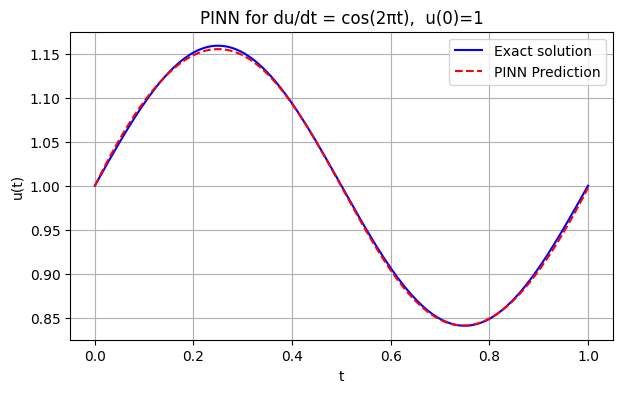

In [ ]:
# Code Cell 6: Plot and Compare

t_test = torch.linspace(0.0, 1.0, 200).unsqueeze(1)
u_pred = model(t_test).detach().numpy()

# Exact solution for reference
import numpy as np
t_test_np = t_test.detach().numpy()
u_exact = (1.0/(2*np.pi))*np.sin(2*np.pi*t_test_np) + 1.0

# Plot
plt.figure(figsize=(7,4))
plt.plot(t_test_np, u_exact, 'b', label='Exact solution')
plt.plot(t_test_np, u_pred, 'r--', label='PINN Prediction')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('PINN for du/dt = cos(2πt),  u(0)=1')
plt.legend()
plt.grid(True)
plt.show()


**Conclusion**

- We **constructed a neural network** (PINN) to solve the ODE:
  $$\frac{du}{dt} = \cos(2\pi t),\quad u(0)=1.$$
- We used **collocation points** in [0,1] and enforced:
  1. **ODE residual**: $\frac{d\hat{u}}{dt} - \cos(2\pi t) = 0$,
  2. **Initial condition**: $\hat{u}(0)=1$.
- Our **loss function** was a sum of the ODE part and the IC part.
- After training, the PINN’s prediction $\hat{u}(t)$ matches closely the **true solution** $u(t)=\frac{1}{2\pi}\sin(2\pi t)+1$.
- This example demonstrates how **Neural Networks** can be adapted for solving simple differential equations by incorporating physics-based constraints directly into the loss.
---